In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [29]:
df = pd.read_csv(r"Data-sets\titanic_toy.csv")

In [31]:
df.columns

Index(['Age', 'Fare', 'Family', 'Survived'], dtype='object')

In [32]:
df.head(2)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1


# Checking the null values in each column

In [33]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [36]:
(df.isnull().mean())*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [37]:
for c in df.columns:
    # print(c)
    print((df[c].isnull().sum() / df.shape[0])*100)

19.865319865319865
5.05050505050505
0.0
0.0


## Age column has 19 percent missing value and fare has 5 percent missing values

In [47]:
x=df.iloc[:,0:3]
y=df.iloc[:,3:]

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=42,test_size=0.1)

In [53]:
x_train

,Age,Fare,Family
165,9.0,20.5250,2
541,9.0,31.2750,6
625,61.0,32.3208,0
388,NaN,7.7292,0
76,NaN,7.8958,0
...,...,...,...
106,21.0,7.6500,0
270,NaN,31.0000,0
860,41.0,NaN,2
435,14.0,120.0000,3


Original Variance of Age: 213.4440387522628
Original Variance of Fare: 2586.2245795981635


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


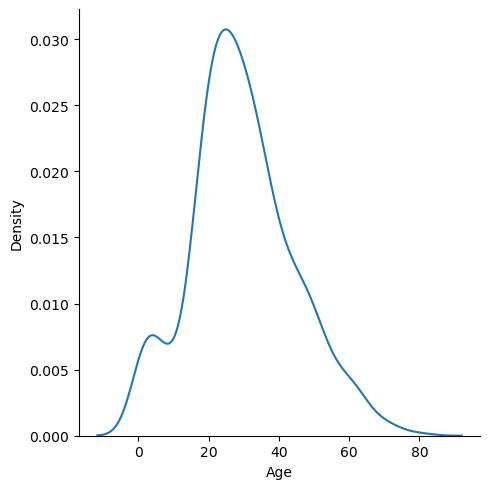

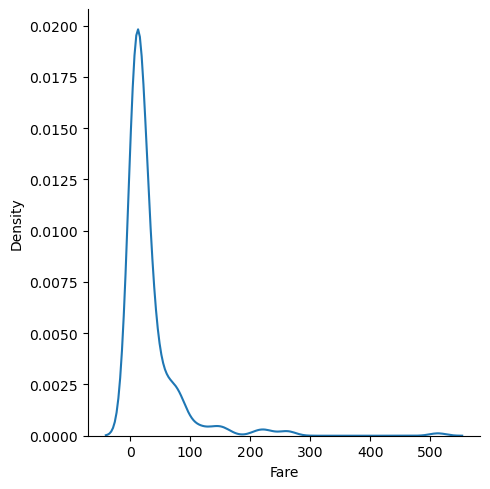

In [66]:
for col in ['Age','Fare']:
    print(f'Original Variance of {col}:',x_train[col].var())
    sns.displot(data=x_train,x=f'{col}',kind='kde')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Original Variance of Age: 213.4440387522628
Original Variance of Fare: 2586.2245795981635


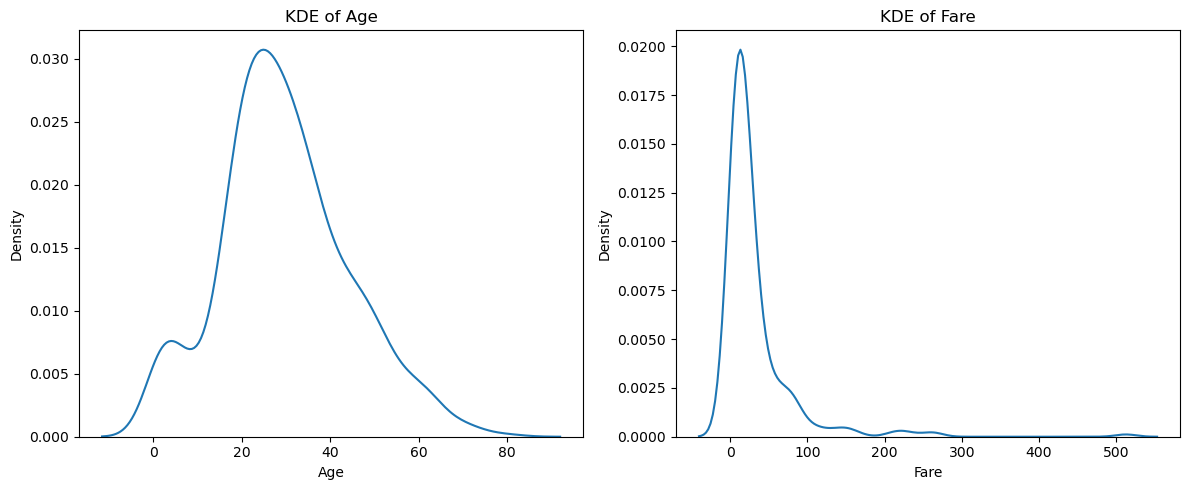

In [67]:

# Set up the figure and axes for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot 'Age' distribution on the first axis
sns.kdeplot(data=x_train, x='Age', ax=axes[0])
axes[0].set_title('KDE of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')
print(f'Original Variance of Age:', x_train['Age'].var())

# Plot 'Fare' distribution on the second axis
sns.kdeplot(data=x_train, x='Fare', ax=axes[1])
axes[1].set_title('KDE of Fare')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Density')
print(f'Original Variance of Fare:', x_train['Fare'].var())

# Display the plots
plt.tight_layout()
plt.show()


### Note :
#### we can see that original varaince of age is 213 and original varaince of fare is 2586 . Since age is normally distributed we will use mean and since fare is skewed we will use median .. But if the original varaince(before imputation) and varaince(after imputation) changes drastically then we wont use that imputation

In [78]:
from sklearn.impute import SimpleImputer
age_impute = SimpleImputer(missing_values=np.nan, strategy='mean')
fare_impute = SimpleImputer(missing_values=np.nan, strategy='median')

In [81]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(

    [("age_impute", age_impute, ['Age']),

     ("fare_impute", fare_impute, ['Fare'])
    ])

In [83]:
ct.fit(x_train)

ColumnTransformer(transformers=[('age_impute', SimpleImputer(), ['Age']),
                                ('fare_impute',
                                 SimpleImputer(strategy='median'), ['Fare'])])

In [91]:
impute_df=ct.transform(x_train)
impute_df = pd.DataFrame(impute_df,columns=['Age','Fare'])

In [93]:
impute_df.head(4)

,Age,Fare
0,9.000000,20.5250
1,9.000000,31.2750
2,61.000000,32.3208
3,29.750657,7.7292


In [94]:
print(df['Age'].var())
print(df['Fare'].var())


211.0191247463081
2530.6730768999487


In [ ]:
print(impute_df['Age'].var())
print(df['Fare'].var())